# Admission Prediction Project

**Problem Statement**
- The goal of this project is to predict the likelihood of a student getting admitted to a university based on various features such as GRE Score, TOEFL Score, University Rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, and Research experience. This prediction can help students understand their chances and improve their profiles accordingly.

**Importing libraries**

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [160]:
df=pd.read_csv("admission_predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## **Data Understanding**

Before fixing wrong data formats, we should first check what kind of values are present in each column. This helps us identify:
- Unexpected values
- Incorrect formats
- Missing or special characters

In [161]:
# To findout no.of rows and columns present in our dataset 
df.shape

(500, 9)

In [162]:
# Data types and non-null values  
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- All columns data types are correct

**Feature Elimination**

- am dropping Serial No. column as it is of no use

In [163]:
df.drop('Serial No.',axis=1,inplace=True)

In [164]:
df.describe()    

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [165]:
# check for any wrong column name 
df.columns 

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

- LOR and Chanch of Admit columns have an extra space at the end 

In [166]:
# Check unique values for each column

for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique()[:20])  # Show first 20 unique values
    print("-" * 40)

Column: GRE Score
[337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312]
----------------------------------------
Column: TOEFL Score
[118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93]
----------------------------------------
Column: University Rating
[4 3 2 5 1]
----------------------------------------
Column: SOP
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
----------------------------------------
Column: LOR 
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
----------------------------------------
Column: CGPA
[9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6 ]
----------------------------------------
Column: Research
[1 0]
----------------------------------------
Column: Chance of Admit 
[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.63 0.64 0.7 ]
----------------------------------------


- it is easy to check unique values in categorical and count vatiables 
- but its very difficult to findout wrong data formats in continous variables 
- so , here is the code to check , wrong data format in continuous variables 

In [167]:
# check for incorrect data - or for any typo's 
# The code detects values in continuous columns that are not in the correct numerical format (e.g., strings, special characters, or typos).
# It provides a clear output of which columns contain incorrect data and what those incorrect values are.

# List of continuous columns
continuous_cols = ['GRE Score', 'TOEFL Score','SOP', 'LOR ', 'CGPA', 'Chance of Admit '] 

# Check for wrong formats in continuous columns
for col in continuous_cols:
    wrong_values = df[~df[col].astype(str).str.replace('.', '', 1).str.isdigit()]  
    
    if not wrong_values.empty:
        print(f"Column with wrong format: {col}")
        print("Wrong Values Found:")
        print(wrong_values[[col]])  # Print only the column with wrong values
        print("-" * 60)

- Column Data Types:
  - All columns contain values consistent with their defined data types.
  - No columns have mixed or incorrect data types (e.g., no strings in numerical columns or vice versa).

- Data Integrity:
  - No incorrect or invalid data is present in any column (e.g., no negative values in age, no typos in categorical columns).
  - All values align with the expected domain or range for their respective columns. 

In [168]:
df.skew()

GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

- Skewness < -1: Strong negative skew
- Skewness > 1: Strong positive skew
- Skewness between -1 and 1: Symmetrical or acceptable distribution

In [169]:
# check for missing values 
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [170]:
# check for duplicates 
df.duplicated().sum()

0

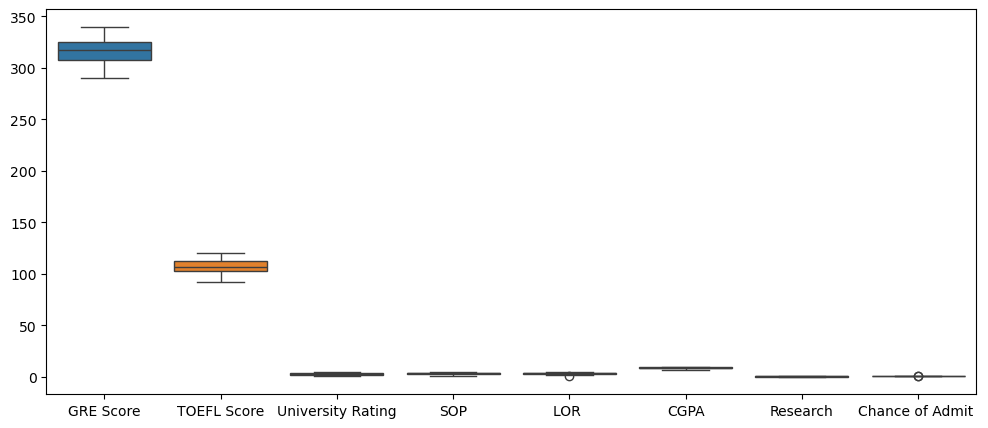

In [171]:
# Outlier detection 

plt.figure(figsize=(12,5))
sns.boxplot(data=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research', 'Chance of Admit ']])       # ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']
plt.show()

In [172]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25) 
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Extract outliers from both columns
outliers_LOR = detect_outliers_iqr(df, "LOR ")
outliers_COA = detect_outliers_iqr(df, "Chance of Admit ")


outliers_combined = pd.concat([outliers_LOR , outliers_COA]).drop_duplicates()
outliers_combined

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


- outliers are extreme values that deviate significantly from the rest of the data
- outliers should be checked in the numerical columns that have continuous values.
- outliers in the columns can distort statistical analysis and machine learning models.

- These don't appear to be actual outliers and are likely valid data points that reflect different applicant scenarios.
- They do not seem to have a significant impact on our analysis.
- These values are reasonable and represent the diversity of applicants, so I am retaining them.

## **Data Cleaning**

**1.Handling missing values**

- There are no missing values 

**2.Remove duplicate values**

- No Duplicated values

**3.Handling Outliers**

- No Outliers 

**4.Handling Incorrect Data**

In [173]:
# Here column names are just having an extra space at the end , so am just removing that 
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)

- All the columns have correct data , and data types

## **Data Preprocessing**

**1.Feature Engineering**

In [174]:
# New column creation 
# There is no need to create new columns from the existing ones for this dataset.

In [175]:
# Transform Features
# No transformation is needed as there is minimal skew present in the columns.

In [176]:
# 3.Handling Categorical Features
# we don't even have any categorical columns in this dataset

**2.Encoding**

In [177]:
# converting categorical columns to numerical columns
# we don't have any categorical columns

**3.Feature Selection**

- Feature Selection is the process of selecting the most important features (or columns) that contribute to predicting the target variable.
- It helps improve model performance by eliminating irrelevant or redundant data, reducing overfitting, and improving computational efficiency.

Why is Feature Selection Important?
 - Reduces overfitting: By removing irrelevant features, the model becomes less complex and avoids learning noise.
 - Improves accuracy: Focusing on the most relevant features can make the model more accurate.
 - Saves time and resources: Fewer features mean faster training and testing times.

**Heatmap (For Correlation Analysis)**
- Use when: You want to check how numerical features are related.
- Apply on: All numerical columns.

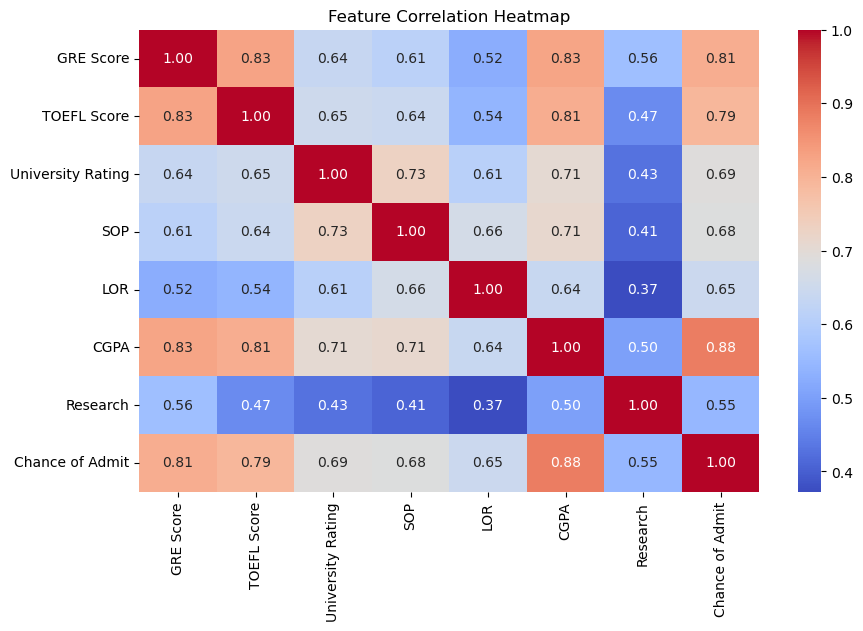

In [178]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Since 
- CGPA 
- GRE Score
- TOEFL Score

have the highest impact on Chance of Admit, the next step is to explore them in detail.

**Check Distribution of Each Feature**

- A histplot (or histogram) is used to visualize the distribution of a single continuous variable.
- It helps to understand the frequency or count of data points within different value ranges (bins).
- Histograms are useful for checking the distribution, identifying skewness, and spotting outliers in data.
- In this case, we use it to visualize the distribution of variables like GRE Score, TOEFL Score, CGPA, etc.

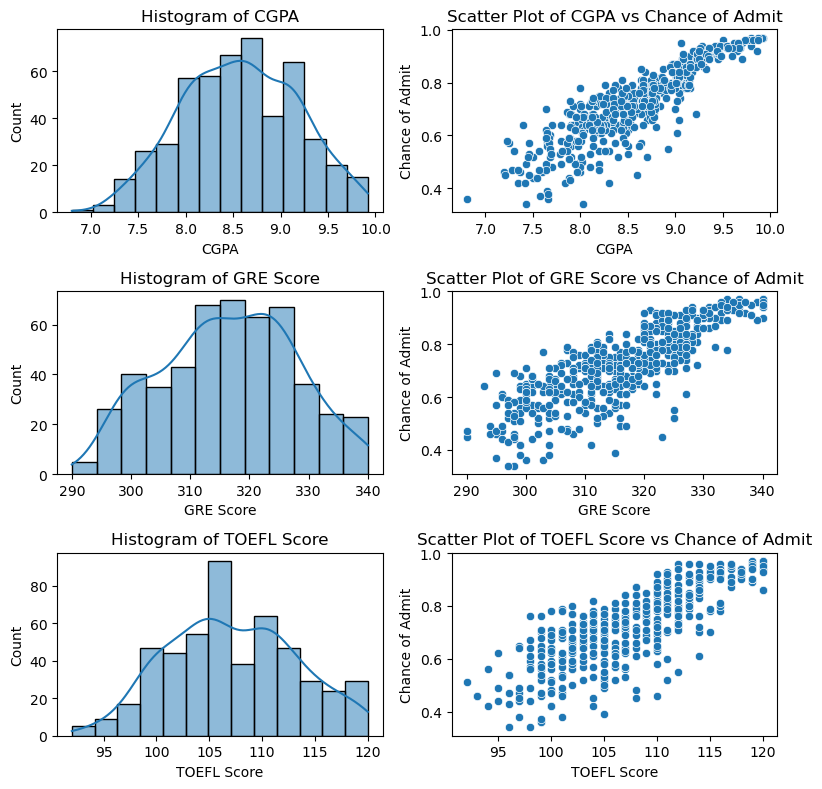

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features
features = ['CGPA', 'GRE Score', 'TOEFL Score']

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for i, feature in enumerate(features):
    # Histogram
    sns.histplot(df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')

    # Scatter Plot
    sns.scatterplot(x=df[feature], y=df['Chance of Admit'], ax=axes[i, 1])
    axes[i, 1].set_title(f'Scatter Plot of {feature} vs Chance of Admit')

# Adjust layout
plt.tight_layout()
plt.show()


## Pair plot

- Pair plot is used to visualize the pairwise relationships between continuous variables.
- It is particularly useful for spotting correlations, trends, and patterns among numeric variables.
- This plot is ideal when you have multiple continuous variables and want to see how they relate to one another.
- In this case, we use it for continuous variables like GRE Score, TOEFL Score, CGPA, and Chance of Admit.

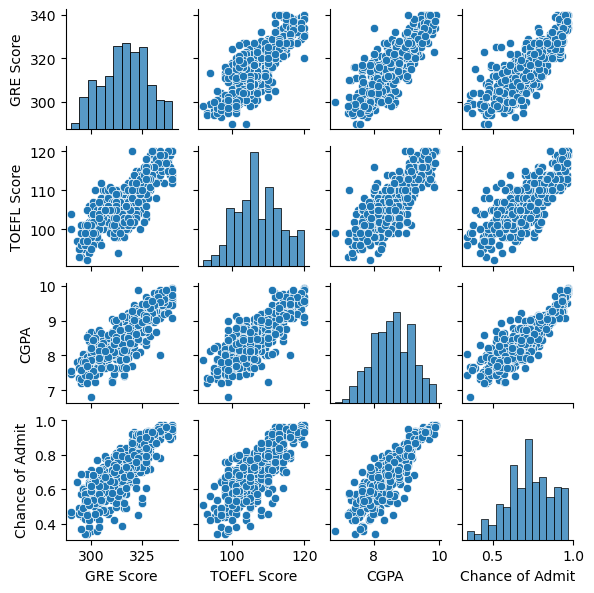

In [180]:
a = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
sns.pairplot(df[a],height=1.5)
plt.show()

- The relation between ouput varaible and input variable should be high.
- The higher the value the stronger the correlation, better accuracy
- if it has less correlation, it is a problem... less accuracy
- if any input variable has correlation less than 0.2 with output variable, then that input variable should be dropped
- The relation between any two independent variables should be low
- If the correlation between any 2 independent variables is >=0.5, then it is called as colinearity problem
- Solution: drop 1 out of 2

In [181]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


**Feature Scaling (Normalization/Standardization)**

In [183]:
cols_to_scale = ['GRE Score','TOEFL Score','University Rating', 'SOP', 'LOR', 'Research','Chance of Admit']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [184]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,9.65,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,8.87,1.0,0.666667


## Train Test Split 

In [186]:
x=df.drop("Chance of Admit",axis=1)
y=df["Chance of Admit"]

In [187]:
r2=[]
cv=[]
for i in range(1,100):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_train,y_train)
    
    ypred_train=model.predict(x_train)
    
    from sklearn.metrics import r2_score
    r2.append(r2_score(y_train,ypred_train))
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,x_train,y_train,cv=5,scoring="r2").mean())

a=pd.DataFrame({"r2":r2,"cv":cv})
b=a[(abs(a["r2"]-a["cv"])<=0.05)]
c=b[b["cv"]==b["cv"].max()].index.tolist()[0]
print(c)


62


In [188]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=62)

# Linear Regression

In [243]:
%%time
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

print(model.coef_)
print(model.intercept_)

[0.17830182 0.14124605 0.02833712 0.0282097  0.11484174 0.1719937
 0.02988031]
-1.15989683406732
CPU times: total: 0 ns
Wall time: 5 ms


In [201]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

print("Train R2  ",r2_score(y_train,ypred_train))
print(" cv       ",cross_val_score(model,x_train,y_train,cv=5,scoring="r2").mean())
print("Test R2  ",r2_score(y_test,ypred_test))

Train R2   0.8230124739980311
 cv        0.8066688190048513
Test R2   0.8021503144846782


In [202]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.8,random_state=62)

import statsmodels.formula.api as smf
model1=smf.ols("y_train~x_train",data=df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     260.4
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          4.03e-143
Time:                        11:37:05   Log-Likelihood:                 378.01
No. Observations:                 400   AIC:                            -740.0
Df Residuals:                     392   BIC:                            -708.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1599      0.127     -9.117      0.000      -1.410      -0.910
x_train[0]     0.1783      0.046      3.873      0.000       0.088       0.269
x_train[1]     0.1412      0.043      3.293      0.001       0.057       0.226
x_train[2]     0.0283      0.027      1.060      0.290      -0.024       0.081
x_train[3]     0.0282      0.033      0.862      0.389      -0.036       0.093
x_train[4]     0.1148      0.030      3.855      0.000       0.056       0.173
x_train[5]     0.1720      0.018      9.647      0.000       0.137       0.207
x_train[6]     0.0299      0.012      2.485      0.013       0.006       0.054
==============================================================================
Omnibus:                       90.785   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.296
Skew:                          -1.125   Prob(JB):                     3.96e-48
Kurtosis:                       5.834   Cond. No.                         242.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- in above case All variables are significant (important)
- reason : p < 0.05
- meaning : regression is fitted and best for this dataset than Average model 

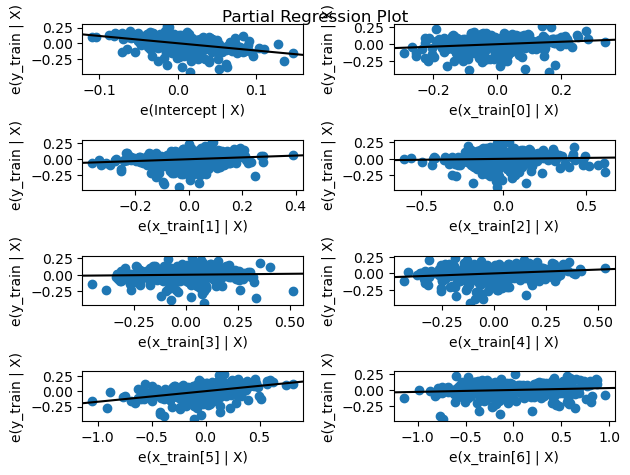

In [203]:
import statsmodels.api as sm 
sm.graphics.plot_partregress_grid(model1)
plt.show()

# Non Linear Regression

### choosing the best polynomial for given dataset

In [204]:
train_r2=[]
test_r2=[] 
for i in range(1,10):
    from sklearn.preprocessing import PolynomialFeatures
    polynomial_converter=PolynomialFeatures(degree=i)
    x_train_poly=pd.DataFrame(polynomial_converter.fit_transform(x_train))
    x_test_poly=pd.DataFrame(polynomial_converter.transform(x_test))
    model=LinearRegression()
    model.fit(x_train_poly,y_train)
    ypred_train=model.predict(x_train_poly)
    train_r2.append(model.score(x_train_poly,y_train))
    ypred_test=model.predict(x_test_poly)
    test_r2.append(model.score(x_test_poly,y_test))

In [205]:
train_r2

[0.8230124739980311,
 0.8372777935440453,
 0.7364886506424886,
 0.947193830720487,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [206]:
test_r2

[0.8021503144846784,
 0.811307274186333,
 0.48163603719546766,
 -14.956332457949555,
 -338.63531364763236,
 -243.149754389886,
 -185.78642425812527,
 -145.76250513779132,
 -117.14298490850545]

In [207]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2) # 2 works fine than 3 
x_train_poly=pd.DataFrame(pf.fit_transform(x_train))
x_test_poly=pd.DataFrame(pf.transform(x_test))


model=LinearRegression()
model.fit(x_train_poly,y_train)

ypred_train=model.predict(x_train_poly)
ypred_test=model.predict(x_test_poly)

print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(model,x_train_poly,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

Train r2   0.8372777935440453
cv         0.7901467142446159
Test r2    0.811307274186333


# Lasso 

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
estimator=Lasso()

param_grid={'alpha':list(range(1,10))}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 1}

In [209]:
lasso_best=Lasso(alpha=1)
lasso_best.fit(x_train,y_train)

print("intercept:",lasso_best.intercept_)
print("coefficient :",lasso_best.coef_)

intercept: 0.6178174603174604
coefficient : [0. 0. 0. 0. 0. 0. 0.]


In [210]:
ypred_train=lasso_best.predict(x_train)
ypred_test=lasso_best.predict(x_test)


print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(lasso_best,x_train,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

Train r2   0.0
cv         -0.030295731822486304
Test r2    -0.07393234989516917


# Ridge 

In [244]:
%%time
from sklearn.linear_model import Ridge
estimator=Ridge()
param_grid={'alpha':list(range(1,20))}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_hp.fit(x_train,y_train)
model_hp.best_params_

CPU times: total: 391 ms
Wall time: 384 ms


{'alpha': 3}

In [212]:
ridge_best=Ridge(alpha=1)
ridge_best.fit(x_train,y_train)

print("intercept:",ridge_best.intercept_)
print("coefficient :",ridge_best.coef_)

intercept: -1.1912484519979443
coefficient : [0.1599157  0.1338496  0.03225541 0.03142331 0.106888   0.17719022
 0.03265651]
CPU times: total: 0 ns
Wall time: 2.38 ms


In [213]:
ypred_train=ridge_best.predict(x_train)
ypred_test=ridge_best.predict(x_test)


print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(ridge_best,x_train,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

Train r2   0.8228353015473563
cv         0.808182849552432
Test r2    0.8050993410269156


# Elastic Net 

In [214]:
from sklearn.linear_model import ElasticNet
enr_base=ElasticNet()
enr_base.fit(x_train,y_train)


ypred_train=enr_base.predict(x_train)
ypred_test=enr_base.predict(x_test)


print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(enr_base,x_train,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

Train r2   0.0
cv         -0.030295731822486304
Test r2    -0.07393234989516917


- l1_ratio = 0: Elastic Net behaves like Ridge regression (pure L2 regularization).
- l1_ratio = 1: Elastic Net behaves like Lasso regression (pure L1 regularization).
- 0 < l1_ratio < 1: A mix of both L1 and L2 regularization.

In [215]:
from sklearn.model_selection import GridSearchCV
estimator=ElasticNet()
param_grid={"alpha":[0.1,0.2,1,2,3,5,10],"l1_ratio":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [216]:
enr_base=ElasticNet(alpha=0.1,l1_ratio=0.1)
enr_base.fit(x_train,y_train)
print("intercept:",enr_base.intercept_)
print("coeeficient:",enr_base.coef_)
print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(enr_base,x_train,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

intercept: -1.2320031067536295
coeeficient: [0.01949065 0.01783651 0.0240888  0.00663162 0.00867851 0.20688069
 0.04348234]
Train r2   0.0
cv         0.7411049009723221
Test r2    -0.07393234989516917


# SVM Regressor

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [218]:
from sklearn.svm import SVR
estimator=SVR()
param_grid={'C':[0.001,0.01,0.1,1,10],'kernel':["linear","sigmoid","poly","rbf"]}
svr_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
svr_hp.fit(X_train_scaled,y_train)
svr_hp.best_estimator_

SVR(C=0.1, kernel='linear')

In [219]:
svr_model=svr_hp.best_estimator_
svr_model.fit(X_train_scaled,y_train)

ypred_train=svr_model.predict(X_train_scaled)
ypred_test=svr_model.predict(X_test_scaled)

print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(svr_model,X_train_scaled,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

Train r2   0.8179124047146242
cv         0.7996646663233378
Test r2    0.7862982925690363


# Decision Tree Regressor 

In [220]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=True)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=True)

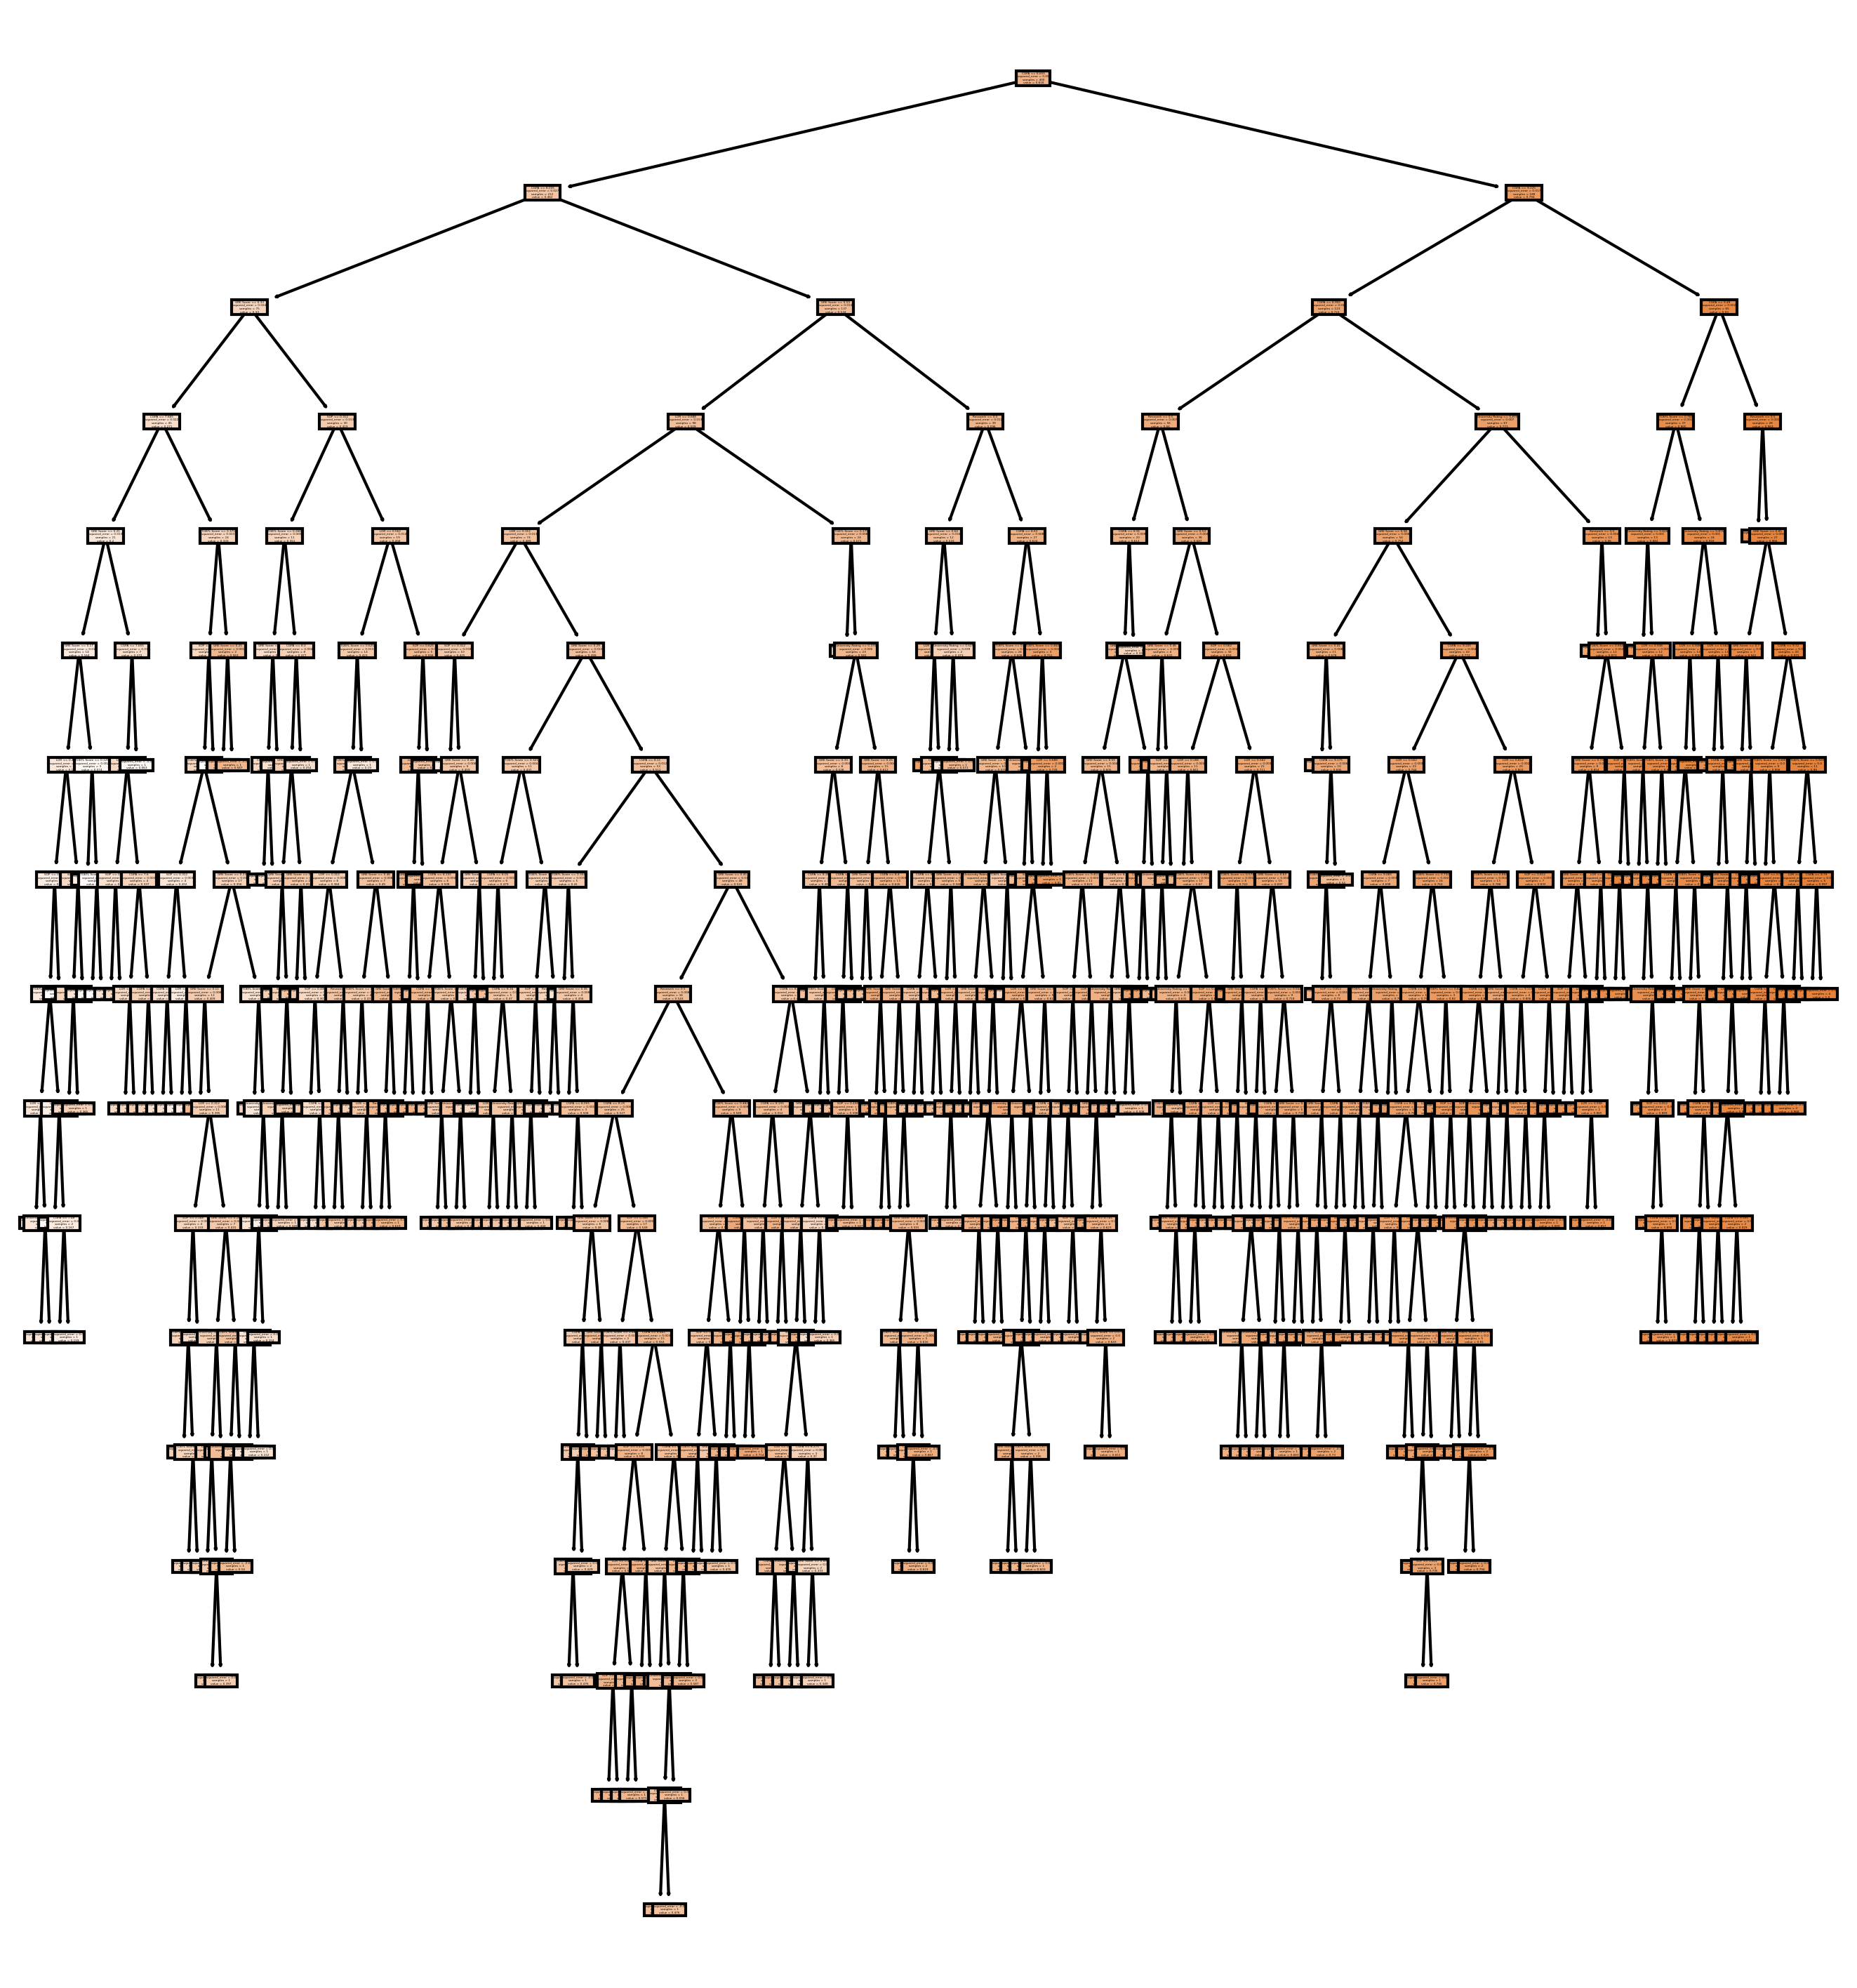

In [221]:
from sklearn.tree import plot_tree
plt.figure(figsize=(11,12),dpi=300)
plot_tree(model,filled=True,feature_names=x_train.columns.tolist())
plt.show()

In [222]:
estimator=DecisionTreeRegressor(random_state=True)
param_grid={"criterion":["squared_error", "absolute_error", "friedman_mse"],"max_depth":list(range(1,17))}
dt_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
dt_hp.fit(x_train,y_train)
dt=dt_hp.best_estimator_

In [223]:
fea=pd.DataFrame(data=dt.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['GRE Score', 'CGPA']

In [224]:
x_train_dt=x_train[features]
x_test_dt=x_test[features]
dt=dt_hp.best_estimator_
dt.fit(x_train_dt,y_train)

ypred_train=dt.predict(x_train_dt)
ypred_test=dt.predict(x_test_dt)
print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(dt,x_train_dt,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

Train r2   0.7951172543619159
cv         0.7277875163253331
Test r2    0.7203448598894571


# Random Forest Regressor

In [228]:
from sklearn.ensemble import RandomForestRegressor
estimator=RandomForestRegressor(random_state=True)
param_grid={"n_estimators":list(range(1,17))}
rf_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
rf_hp.fit(x_train,y_train)
rf=rf_hp.best_estimator_
rf

RandomForestRegressor(n_estimators=16, random_state=True)

In [229]:
fea=pd.DataFrame(data=rf.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']

In [230]:
x_train_rf=x_train[features]
x_test_rf=x_test[features]
rf=rf_hp.best_estimator_
rf.fit(x_train_rf,y_train)

ypred_train=rf.predict(x_train_rf)
ypred_test=rf.predict(x_test_rf)
print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

Train r2   0.9650004349238717
cv         0.7402214763287784
Test r2    0.7720636619967738


# KNN Regressor

In [231]:
from sklearn.neighbors import KNeighborsRegressor
estimator=KNeighborsRegressor()
param_grid={'n_neighbors':list(range(1,20)),'p':[1,2]}
knn_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
knn_hp.fit(X_train_scaled,y_train)
knn_hp.best_estimator_

KNeighborsRegressor(n_neighbors=16, p=1)

In [232]:
knn_model=knn_hp.best_estimator_
knn_model.fit(X_train_scaled,y_train)


ypred_train=knn_model.predict(X_train_scaled)
ypred_test=knn_model.predict(X_test_scaled)
print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(knn_model,X_train_scaled,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

Train r2   0.8081613803262655
cv         0.7808648005511896
Test r2    0.7695116288092326


# Gradient Regressor

In [237]:
from sklearn.ensemble import GradientBoostingRegressor
estimator=GradientBoostingRegressor(random_state=True)
param_grid={"n_estimators":list(range(1,17)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grad_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
grad_hp.fit(x_train,y_train)
grad=grad_hp.best_estimator_
grad

GradientBoostingRegressor(learning_rate=0.2, n_estimators=16, random_state=True)

In [238]:
fea=pd.DataFrame(data=grad.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']

In [239]:
x_train_grad=x_train[features]
x_test_grad=x_test[features]
grad=grad_hp.best_estimator_
grad.fit(x_train_grad,y_train)

ypred_train=grad.predict(x_train_grad)
ypred_test=grad.predict(x_test_grad)
print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(grad,x_train_grad,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

Train r2   0.8692451578335372
cv         0.7881666498352033
Test r2    0.7939802203079087


# XG Boost Regressor 

In [240]:
from xgboost import XGBRegressor
estimator=XGBRegressor(random_state=1)
param_grid={"n_estimators":[10,20,30,40,50],"max_depth":[3,4,5,6,7,8,9],'gamma':[0,0.15,0.3,0.5,1]}
xg_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="r2")
xg_hp.fit(x_train,y_train)
xg=xg_hp.best_estimator_
xg     

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [241]:
fea=pd.DataFrame(data=xg.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']

In [242]:
x_train_xg=x_train[features]
x_test_xg=x_test[features]
xg=xg_hp.best_estimator_
xg.fit(x_train_xg,y_train)

ypred_train=xg.predict(x_train_xg)
ypred_test=xg.predict(x_test_xg)
print("Train r2  ",r2_score(y_train,ypred_train))
print("cv        ",cross_val_score(xg,x_train_xg,y_train,cv=5,scoring="r2").mean())
print("Test r2   ",r2_score(y_test,ypred_test))

Train r2   0.8671507966982668
cv         0.7796356048655257
Test r2    0.7885546993221653


-  Although both Linear Regression and Ridge Regression give the same accuracy, Linear Regression is taking significantly less time. Therefore, Linear Regression is the better choice for this dataset.